# Gesture Phase Recognition

## March 2021

Lucie Drevet, DIA1

In [290]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
import pandas as pd

import matplotlib.pyplot as plt
keras.__version__

'2.4.0'

In [291]:
#First we import the datasets
train = pd.read_csv('/content/phpYLeydd_train_5.csv', header=None)
test = pd.read_csv('/content/phpYLeydd_test.csv', header=None)
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.008698,-0.004076,-0.002762,0.002546,-0.000775,0.000470,-0.011735,-0.006037,-0.003555,0.002243,-0.000629,0.000400,-0.000254,-0.000411,-0.000146,-0.000847,0.000757,-5.713000e-05,-0.000053,-0.000513,-0.000136,-0.000943,8.413500e-04,-0.000053,0.009995,0.002703,0.013667,0.002363,0.000505,0.001137,0.000533,0.001265,'H'
1,0.010705,-0.005042,-0.000821,-0.032239,0.007675,0.000003,0.007935,-0.003284,-0.000503,-0.016884,0.001384,0.000210,0.001659,-0.001250,-0.000150,-0.004815,0.001459,-6.400000e-07,0.001260,-0.000852,-0.000106,-0.002365,5.555400e-04,0.000026,0.011861,0.033140,0.008602,0.016942,0.002083,0.005031,0.001525,0.002430,'S'
2,0.010225,-0.005102,-0.001765,0.000209,0.003688,0.000207,0.008022,-0.004018,-0.000957,0.000011,0.000282,-0.000003,0.002880,-0.001205,-0.000380,-0.000105,0.000172,4.255000e-05,0.001190,-0.000529,-0.000118,-0.000049,-1.500000e-07,0.000008,0.011562,0.003700,0.009022,0.000282,0.003145,0.000206,0.001308,0.000050,'P'
3,0.001322,0.002716,0.000919,0.002965,0.004803,-0.002245,-0.000537,0.002385,0.001186,0.002661,0.004261,-0.001465,0.000028,-0.000065,-0.000084,-0.001283,-0.001579,4.848200e-04,0.000126,-0.000261,-0.000186,-0.000878,-9.911600e-04,0.000332,0.003158,0.006075,0.002717,0.005233,0.000110,0.002091,0.000344,0.001365,'S'
4,-0.000958,-0.000173,-0.000050,-0.003966,-0.001001,-0.000135,-0.000689,-0.000122,0.000013,-0.002953,-0.000702,-0.000124,0.000003,0.000008,-0.000006,0.002634,-0.000133,2.454600e-04,0.000008,0.000009,-0.000005,-0.000674,-2.233200e-04,-0.000029,0.000974,0.004093,0.000699,0.003038,0.000010,0.002649,0.000013,0.000710,'D'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,0.000863,0.000147,-0.000103,-0.028183,-0.001854,-0.002864,0.000168,-0.000328,0.000223,-0.019225,-0.007321,-0.005099,-0.000143,-0.000195,0.000020,0.000374,0.002706,1.388500e-04,-0.000157,-0.000086,-0.000009,0.002974,2.737240e-03,-0.000251,0.000881,0.028388,0.000431,0.021195,0.000243,0.002736,0.000179,0.004050,'S'
7865,-0.004186,0.005957,0.001975,0.003555,0.007504,0.002729,-0.000520,0.004258,0.001102,0.001782,0.004892,0.000639,-0.001707,0.000496,0.000395,0.000924,0.000247,2.503600e-04,-0.000841,0.000008,0.000380,0.000223,-1.724400e-04,0.000122,0.007544,0.008741,0.004429,0.005246,0.001821,0.000989,0.000924,0.000307,'R'
7866,-0.000065,0.000032,-0.000029,0.000047,-0.000255,-0.000033,-0.000135,0.000012,-0.000016,0.000126,-0.000398,-0.000030,0.000005,0.000045,-0.000004,-0.003658,-0.001217,-1.341200e-04,-0.000004,0.000044,-0.000003,-0.005602,1.958000e-05,-0.000366,0.000078,0.000261,0.000137,0.000419,0.000045,0.003858,0.000045,0.005614,'D'
7867,-0.000133,-0.000296,0.000038,-0.000341,-0.000054,0.000042,-0.001049,0.001773,-0.000022,0.002901,0.002312,-0.001474,-0.000033,0.000040,-0.000004,-0.000027,0.000009,3.050000e-06,-0.000195,0.000801,-0.000026,0.001375,7.963600e-04,-0.000387,0.000327,0.000348,0.002060,0.003992,0.000052,0.000029,0.000825,0.001635,'D'


Then we apply label encoded for the class attribute

In [292]:
train[32] = train[32].astype('category')
train[32] = train[32].astype('category').cat.codes
test[32] = test[32].astype('category')
test[32] = test[32].astype('category').cat.codes

We scale the data

In [293]:
for i in range(32):
  if train.dtypes[i]=='int64':
    train[i]=(train[i]-train[i].mean())/train[i].std()
for i in range(32):
  if test.dtypes[i]=='int64':
    test[i]=(test[i]-test[i].mean())/test[i].std()

In [294]:
#Here is the dataset after preprocessing
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,-0.008698,-0.004076,-0.002762,0.002546,-0.000775,0.000470,-0.011735,-0.006037,-0.003555,0.002243,-0.000629,0.000400,-0.000254,-0.000411,-0.000146,-0.000847,0.000757,-5.713000e-05,-0.000053,-0.000513,-0.000136,-0.000943,8.413500e-04,-0.000053,0.009995,0.002703,0.013667,0.002363,0.000505,0.001137,0.000533,0.001265,1
1,0.010705,-0.005042,-0.000821,-0.032239,0.007675,0.000003,0.007935,-0.003284,-0.000503,-0.016884,0.001384,0.000210,0.001659,-0.001250,-0.000150,-0.004815,0.001459,-6.400000e-07,0.001260,-0.000852,-0.000106,-0.002365,5.555400e-04,0.000026,0.011861,0.033140,0.008602,0.016942,0.002083,0.005031,0.001525,0.002430,4
2,0.010225,-0.005102,-0.001765,0.000209,0.003688,0.000207,0.008022,-0.004018,-0.000957,0.000011,0.000282,-0.000003,0.002880,-0.001205,-0.000380,-0.000105,0.000172,4.255000e-05,0.001190,-0.000529,-0.000118,-0.000049,-1.500000e-07,0.000008,0.011562,0.003700,0.009022,0.000282,0.003145,0.000206,0.001308,0.000050,2
3,0.001322,0.002716,0.000919,0.002965,0.004803,-0.002245,-0.000537,0.002385,0.001186,0.002661,0.004261,-0.001465,0.000028,-0.000065,-0.000084,-0.001283,-0.001579,4.848200e-04,0.000126,-0.000261,-0.000186,-0.000878,-9.911600e-04,0.000332,0.003158,0.006075,0.002717,0.005233,0.000110,0.002091,0.000344,0.001365,4
4,-0.000958,-0.000173,-0.000050,-0.003966,-0.001001,-0.000135,-0.000689,-0.000122,0.000013,-0.002953,-0.000702,-0.000124,0.000003,0.000008,-0.000006,0.002634,-0.000133,2.454600e-04,0.000008,0.000009,-0.000005,-0.000674,-2.233200e-04,-0.000029,0.000974,0.004093,0.000699,0.003038,0.000010,0.002649,0.000013,0.000710,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7864,0.000863,0.000147,-0.000103,-0.028183,-0.001854,-0.002864,0.000168,-0.000328,0.000223,-0.019225,-0.007321,-0.005099,-0.000143,-0.000195,0.000020,0.000374,0.002706,1.388500e-04,-0.000157,-0.000086,-0.000009,0.002974,2.737240e-03,-0.000251,0.000881,0.028388,0.000431,0.021195,0.000243,0.002736,0.000179,0.004050,4
7865,-0.004186,0.005957,0.001975,0.003555,0.007504,0.002729,-0.000520,0.004258,0.001102,0.001782,0.004892,0.000639,-0.001707,0.000496,0.000395,0.000924,0.000247,2.503600e-04,-0.000841,0.000008,0.000380,0.000223,-1.724400e-04,0.000122,0.007544,0.008741,0.004429,0.005246,0.001821,0.000989,0.000924,0.000307,3
7866,-0.000065,0.000032,-0.000029,0.000047,-0.000255,-0.000033,-0.000135,0.000012,-0.000016,0.000126,-0.000398,-0.000030,0.000005,0.000045,-0.000004,-0.003658,-0.001217,-1.341200e-04,-0.000004,0.000044,-0.000003,-0.005602,1.958000e-05,-0.000366,0.000078,0.000261,0.000137,0.000419,0.000045,0.003858,0.000045,0.005614,0
7867,-0.000133,-0.000296,0.000038,-0.000341,-0.000054,0.000042,-0.001049,0.001773,-0.000022,0.002901,0.002312,-0.001474,-0.000033,0.000040,-0.000004,-0.000027,0.000009,3.050000e-06,-0.000195,0.000801,-0.000026,0.001375,7.963600e-04,-0.000387,0.000327,0.000348,0.002060,0.003992,0.000052,0.000029,0.000825,0.001635,0


Transform into array

In [295]:
data_train = train.values
data_test = test.values

Then we split

In [296]:
from keras.utils import np_utils

Xtrain = data_train[:,:-1]
ytrain = data_train[:,-1]
ytrain = np_utils.to_categorical(ytrain, 5)

Xtest = data_test[:,:-1]
ytest = data_test[:,-1]
ytest = np_utils.to_categorical(ytest, 5)

In [297]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)


Xtest.shape, ytest.shape

(6295, 32) (1574, 32) (6295, 5) (1574, 5)


((2004, 32), (2004, 5))

TRAINING PART

In [311]:
from keras.utils import np_utils

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape=(32,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')])

model1.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])

In [312]:
model1_hist = model1.fit(X_train,y_train,batch_size=50,epochs=50, validation_data=(X_val,y_val))


Epoch 1/50
126/126 [==============================] - 2s 9ms/step - loss: 1.4796 - acc: 0.3818 - val_loss: 1.2952 - val_acc: 0.4441
Epoch 2/50
126/126 [==============================] - 1s 8ms/step - loss: 1.2915 - acc: 0.4698 - val_loss: 1.2739 - val_acc: 0.4657
Epoch 3/50
126/126 [==============================] - 1s 7ms/step - loss: 1.2755 - acc: 0.4828 - val_loss: 1.2571 - val_acc: 0.4797
Epoch 4/50
126/126 [==============================] - 1s 7ms/step - loss: 1.2766 - acc: 0.4683 - val_loss: 1.2502 - val_acc: 0.4841
Epoch 5/50
126/126 [==============================] - 1s 7ms/step - loss: 1.2578 - acc: 0.4823 - val_loss: 1.2284 - val_acc: 0.4936
Epoch 6/50
126/126 [==============================] - 1s 7ms/step - loss: 1.2365 - acc: 0.4973 - val_loss: 1.2393 - val_acc: 0.4936
Epoch 7/50
126/126 [==============================] - 1s 8ms/step - loss: 1.2226 - acc: 0.4992 - val_loss: 1.2268 - val_acc: 0.4975
Epoch 8/50
126/126 [==============================] - 1s 7ms/step - loss: 1.

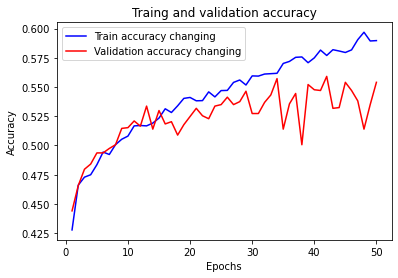

In [313]:
accuracy_model = model1_hist.history['acc']
val_accuracy_model = model1_hist.history['val_acc']

epochs = range(1, 50 + 1)

plt.plot(epochs, accuracy_model, 'b', label = 'Train accuracy changing')
plt.plot(epochs, val_accuracy_model, 'r', label = 'Validation accuracy changing')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

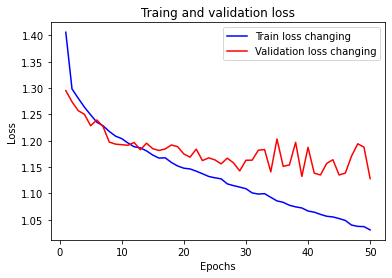

In [314]:
accuracy_model = model1_hist.history['loss']
val_accuracy_model = model1_hist.history['val_loss']

epochs = range(1, 50 + 1)

plt.plot(epochs, accuracy_model, 'b', label = 'Train loss changing')
plt.plot(epochs, val_accuracy_model, 'r', label = 'Validation loss changing')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see some overfitting in accuracy and loss graph. So we will implement a second model with dropout to deal with it. 

In [315]:
from keras.utils import np_utils

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape=(32,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation = 'softmax')])

model2.compile(optimizer='rmsprop',
                       loss= 'categorical_crossentropy',
                       metrics=['acc'])

In [316]:
model2_hist = model2.fit(X_train,y_train,batch_size=50,epochs=50, validation_data=(X_val,y_val))

Epoch 1/50
126/126 [==============================] - 2s 10ms/step - loss: 1.4933 - acc: 0.3540 - val_loss: 1.3218 - val_acc: 0.4543
Epoch 2/50
126/126 [==============================] - 1s 8ms/step - loss: 1.3281 - acc: 0.4579 - val_loss: 1.2833 - val_acc: 0.4606
Epoch 3/50
126/126 [==============================] - 1s 9ms/step - loss: 1.2983 - acc: 0.4560 - val_loss: 1.2779 - val_acc: 0.4784
Epoch 4/50
126/126 [==============================] - 1s 8ms/step - loss: 1.2759 - acc: 0.4668 - val_loss: 1.2534 - val_acc: 0.4898
Epoch 5/50
126/126 [==============================] - 1s 8ms/step - loss: 1.2680 - acc: 0.4766 - val_loss: 1.2560 - val_acc: 0.4854
Epoch 6/50
126/126 [==============================] - 1s 8ms/step - loss: 1.2593 - acc: 0.4821 - val_loss: 1.2382 - val_acc: 0.4994
Epoch 7/50
126/126 [==============================] - 1s 8ms/step - loss: 1.2698 - acc: 0.4781 - val_loss: 1.2344 - val_acc: 0.5000
Epoch 8/50
126/126 [==============================] - 1s 8ms/step - loss: 1

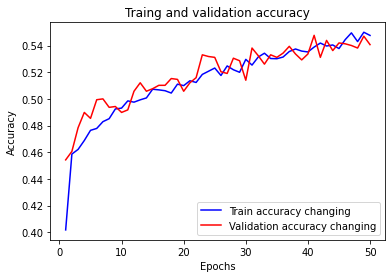

In [317]:
accuracy_model = model2_hist.history['acc']
val_accuracy_model = model2_hist.history['val_acc']

epochs = range(1, 50 + 1)

plt.plot(epochs, accuracy_model, 'b', label = 'Train accuracy changing')
plt.plot(epochs, val_accuracy_model, 'r', label = 'Validation accuracy changing')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

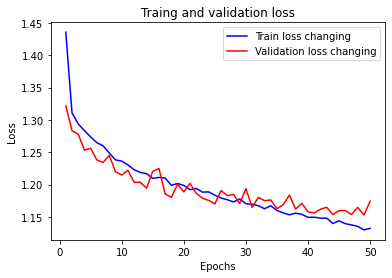

In [318]:
accuracy_model = model2_hist.history['loss']
val_accuracy_model = model2_hist.history['val_loss']

epochs = range(1, 50 + 1)

plt.plot(epochs, accuracy_model, 'b', label = 'Train loss changing')
plt.plot(epochs, val_accuracy_model, 'r', label = 'Validation loss changing')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Now we evaluate on test set

In [319]:
test_loss, test_acc = model2.evaluate(Xtest,  ytest, verbose=1)
test_loss, test_acc 

63/63 [==============================] - 0s 2ms/step - loss: 1.1904 - acc: 0.5299


(1.1904432773590088, 0.529940128326416)

In [320]:
prediction_test = model2.predict(Xtest)

In [321]:
print(prediction_test[0])
ytest[0]

[0.01428014 0.00242308 0.10188136 0.15089014 0.7305253 ]


array([0., 0., 0., 0., 1.], dtype=float32)

It's the good value yeay